         Date     Open     High      Low    Close  Volume
0  29-Mar-2019  3300.0  3348.00  3265.00  3326.00   33841
1  28-Mar-2019  3251.0  3321.00  3230.00  3290.25   22424
2  27-Mar-2019  3220.6  3287.95  3191.05  3267.10   26351
3  26-Mar-2019  3165.0  3287.95  3144.00  3230.00   31056
4  25-Mar-2019  3166.0  3200.05  3135.00  3180.65   15472

****
             Date     Open   High     Low   Close  Volume
2717  07-Apr-2008  672.35  694.5  662.15  685.90    5877
2718  04-Apr-2008  673.00  684.5  669.00  672.35   14869
2719  03-Apr-2008  675.00  691.8  669.10  684.05   11378
2720  02-Apr-2008  695.10  720.0  691.00  700.35   16497
2721  01-Apr-2008  700.00  700.0  675.00  694.70   14215
_________________________________________________________

OPEN 
	Average :  1502.7655951506233 
	Maximum :  3735.0 
	Minimum :  450.0 
	Standard Deviation :  646.3160392814301


HIGH 
	Average :  1524.758082292438 
	Maximum :  3847.7 
	Minimum :  454.1 
	Standard Deviation :  655.7471248643697


LOW 


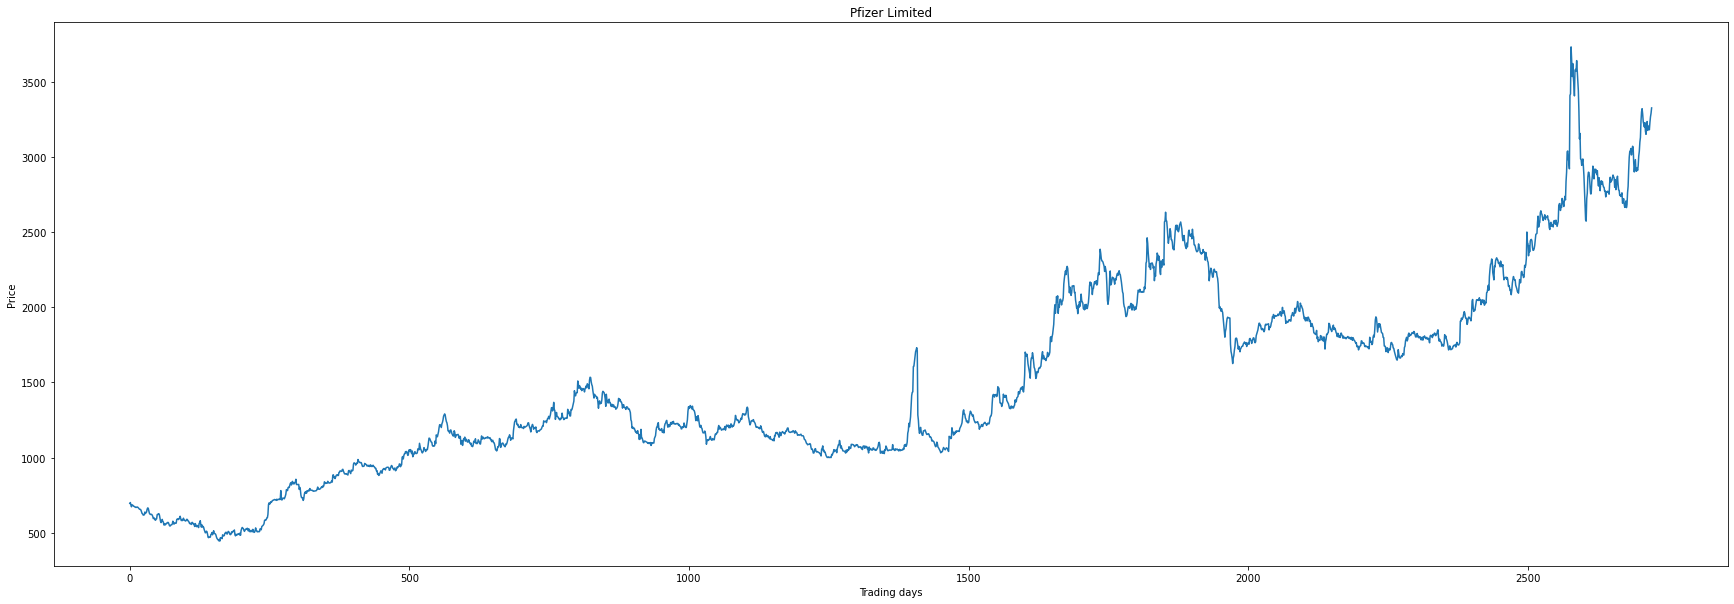

In [1]:
import numpy as np
import pandas as pd

df = pd.read_excel("/home/shravan/Desktop/Datasets/pharma/pfizer/pfizer.xlsx")

print(df.head())
print("\n****\n",df.tail())

print("_________________________________________________________\n\nOPEN \n\tAverage : ",np.mean(df.loc[:]['Open']),"\n\tMaximum : ", np.max(df['Open']),"\n\tMinimum : ", np.min(df['Open']),"\n\tStandard Deviation : ", np.std(df['Open']))
print("\n\nHIGH \n\tAverage : ",np.mean(df.loc[:]['High']),"\n\tMaximum : ", np.max(df['High']),"\n\tMinimum : ", np.min(df['High']),"\n\tStandard Deviation : ", np.std(df['High']))
print("\n\nLOW \n\tAverage : ",np.mean(df.loc[:]['Low']),"\n\tMaximum : ", np.max(df['Low']),"\n\tMinimum : ", np.min(df['Low']),"\n\tStandard Deviation : ", np.std(df['Low']))
print("\n\nCLOSE \n\tAverage : ",np.mean(df.loc[:]['Close']),"\n\tMaximum : ", np.max(df['Close']),"\n\tMinimum : ", np.min(df['Close']),"\n\tStandard Deviation : ", np.std(df['Close']))
print("\n\nVOLUME \n\tAverage : ",np.mean(df.loc[:]['Volume']),"\n\tMaximum : ", np.max(df['Volume']),"\n\tMinimum : ", np.min(df['Volume']),"\n\tStandard Deviation : ", np.std(df['Volume']))

def reverse_data(df):
    date = []
    day = []
    open = []
    high = []
    low = []
    close = []
    volume = []
    for i in range(len(df)-1, -1, -1):
        day.append((len(df)-1)-i)
        date.append(df.loc[i]['Date '])
        open.append(df.loc[i]['Open'])
        high.append(df.loc[i]['High'])
        low.append(df.loc[i]['Low'])
        close.append(df.loc[i]['Close'])
        volume.append(df.loc[i]['Volume'])
    stocks = pd.DataFrame()
    stocks['Day'] = day
    stocks['Date'] = date
    stocks['Open'] = open
    stocks['High'] = high
    stocks['Low'] = low
    stocks['Close'] = close
    stocks['Volume'] = volume
    return stocks

stocks = reverse_data(df)

print(stocks.head())
print("\n****\n",stocks.tail())

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (30,10)
fig,ax = plt.subplots()

ax.plot(stocks['Day'],stocks['Close'])
plt.xlabel("Trading days")
plt.ylabel("Price")
plt.title("Pfizer Limited")
plt.show()

   Day         Date      Open      High       Low     Close    Volume
0    0  01-Apr-2008  0.076104  0.072460  0.075888  0.076263  0.021924
1    1  02-Apr-2008  0.074612  0.078353  0.080947  0.077982  0.025462
2    2  03-Apr-2008  0.068493  0.070044  0.074023  0.073024  0.017525
3    3  04-Apr-2008  0.067884  0.067893  0.073991  0.069466  0.022938
4    4  07-Apr-2008  0.067686  0.070839  0.071825  0.073587  0.008996

****
        Day         Date      Open      High       Low     Close    Volume
2717  2717  25-Mar-2019  0.826788  0.809155  0.853741  0.832342  0.023873
2718  2718  26-Mar-2019  0.826484  0.835057  0.856587  0.847352  0.048035
2719  2719  27-Mar-2019  0.843409  0.835057  0.871464  0.858635  0.040740
2720  2720  28-Mar-2019  0.852664  0.844796  0.883780  0.865676  0.034651
2721  2721  29-Mar-2019  0.867580  0.852752  0.894848  0.876549  0.052353


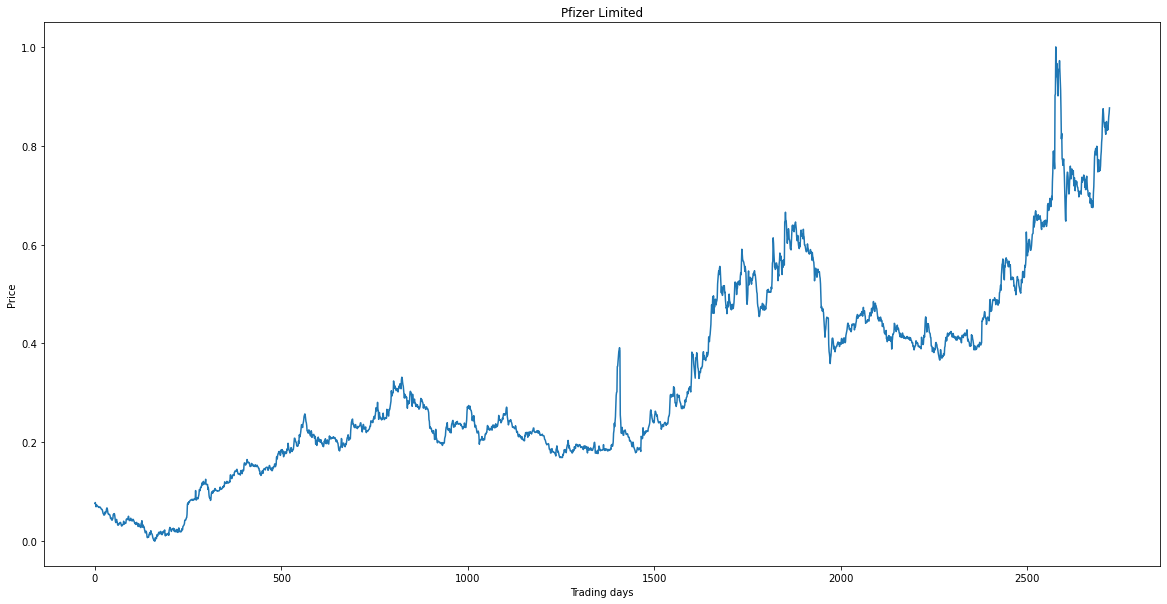

In [2]:
from sklearn.preprocessing import MinMaxScaler

def get_normalised_data(data):
    scaler = MinMaxScaler()
    numerical = ['Open','High','Low','Close','Volume']
    data[numerical] = scaler.fit_transform(data[numerical])
    return data

stocks = get_normalised_data(stocks)

print(stocks.head())
print("\n****\n",stocks.tail())

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20,10)
fig,ax = plt.subplots()

ax.plot(stocks['Day'],stocks['Close'])
plt.xlabel("Trading days")
plt.ylabel("Price")
plt.title("Pfizer Limited")
plt.show()

In [3]:
import math
from IPython.display import display
import time
from keras.layers.core import Dense,Dropout,Activation
from keras.models import Sequential
from keras.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold
from keras.layers.recurrent import LSTM
from keras.layers.recurrent import GRU
from keras.layers.recurrent import SimpleRNN

#UNROLL_FUNCTION
def unroll(stocks,unroll_length):
    result = []
    for i in range(len(stocks)-unroll_length+1):
        result.append(stocks[i : (i+unroll_length)])
    return np.asarray(result)

In [4]:
stocks = stocks.drop(['Date','Day'], axis =1)
stocks.head()

def train_test_split(stocks,unroll_length,prediction_size,prediction_time):
    x_test_start = prediction_size + prediction_time + unroll_length - 1
    
    #train data
    x_train = stocks[0 : (-x_test_start - prediction_time)].to_numpy()
    y_train = stocks[ (unroll_length - 1 + prediction_time) : -x_test_start]['Close'].to_numpy()
    
    #test_data
    x_test = stocks[-x_test_start : -prediction_time].to_numpy()
    y_test = stocks[-prediction_size:]['Close'].to_numpy()

    
    return x_train,x_test,y_train,y_test

prediction_size = 494
prediction_time = 5
unroll_length = 50

x_train,x_test,y_train,y_test = train_test_split(stocks,unroll_length,prediction_size,prediction_time)

x_train = unroll(x_train,unroll_length)
x_test = unroll(x_test,unroll_length)

print("x_train", x_train.shape)
print("y_train", y_train.shape)
print("x_test", x_test.shape)
print("y_test", y_test.shape)

#####



x_train (2120, 50, 5)
y_train (2120,)
x_test (494, 50, 5)
y_test (494,)


In [5]:
def err_stat(y_test,preds):
    Error = preds - y_test
    print("Standard Deviation of Error : ", np.std(Error))
    stdErr = np.std(Error)
    DstdErr = stdErr * (np.max(df['Close']) - np.min(df['Close']))
    print("Denormalised Standard Deviation : ", DstdErr)
    print("Ratio of Standard Deviation of Error to Standard Deviation of Stock Price : ", DstdErr/np.std(df['Close']))


In [6]:
def plot_prediction(actual, prediction, title='PFIZER TRADING VS PREDICTIONS', y_label='Price INR', x_label='Trading Days'):
    
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # Add labels
    plt.ylabel(y_label)
    plt.xlabel(x_label)

    # Plot actual and predicted close values
    plt.plot(actual, '#00FF00', label='Adjusted Close')
    plt.plot(prediction, '#0000FF', label='Predicted Close')

    # Set title
    ax.set_title(title)
    ax.legend(loc='upper left')
    plt.show()
    return fig

In [7]:
x_train.shape[-1]

5

In [9]:
def build_CNN_model(input_dim, output_dim, return_sequences):
    model = Sequential()
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(unroll_length, input_dim)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    #model.add(Dense(100))
    model.add(Dense(units = 1))
    model.add(Activation('linear'))
    model.compile(optimizer='adam', loss='mse')
    return model

In [10]:
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Flatten
#TRAIN_LSTM_MODEL
cnn_model = build_CNN_model(x_train.shape[-1], unroll_length, return_sequences = True)
cnn_model.compile(loss = "mean_squared_error", optimizer = 'Adam')
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 48, 64)            1024      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 24, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 1536)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1537      
_________________________________________________________________
activation (Activation)      (None, 1)                 0         
Total params: 2,561
Trainable params: 2,561
Non-trainable params: 0
_________________________________________________________________


Epoch 1/200
63/63 [==============================] - 2s 15ms/step - loss: 0.0155 - val_loss: 4.7011e-04
Epoch 2/200
63/63 [==============================] - 1s 10ms/step - loss: 0.0016 - val_loss: 4.7979e-04
Epoch 3/200
63/63 [==============================] - 1s 10ms/step - loss: 7.9785e-04 - val_loss: 6.8832e-04
Epoch 4/200
63/63 [==============================] - 1s 10ms/step - loss: 7.1564e-04 - val_loss: 6.6228e-04
Epoch 5/200
63/63 [==============================] - 1s 10ms/step - loss: 5.4438e-04 - val_loss: 2.5644e-04
Epoch 6/200
63/63 [==============================] - 1s 10ms/step - loss: 4.5917e-04 - val_loss: 6.1639e-04
Epoch 7/200
63/63 [==============================] - 1s 10ms/step - loss: 5.2330e-04 - val_loss: 2.6514e-04
Epoch 8/200
63/63 [==============================] - 1s 10ms/step - loss: 4.8804e-04 - val_loss: 2.9263e-04
Epoch 9/200
63/63 [==============================] - 1s 10ms/step - loss: 4.4816e-04 - val_loss: 2.2820e-04
Epoch 10/200
63/63 [================

63/63 [==============================] - 1s 10ms/step - loss: 3.0923e-04 - val_loss: 2.3081e-04
Epoch 77/200
63/63 [==============================] - 1s 10ms/step - loss: 2.5846e-04 - val_loss: 2.3488e-04
Epoch 78/200
63/63 [==============================] - 1s 10ms/step - loss: 2.9068e-04 - val_loss: 1.9960e-04
Epoch 79/200
63/63 [==============================] - 1s 10ms/step - loss: 4.1990e-04 - val_loss: 3.1348e-04
Epoch 80/200
63/63 [==============================] - 1s 10ms/step - loss: 2.5905e-04 - val_loss: 3.7757e-04
Epoch 81/200
63/63 [==============================] - 1s 9ms/step - loss: 2.8016e-04 - val_loss: 3.8581e-04
Epoch 82/200
63/63 [==============================] - 1s 9ms/step - loss: 2.4899e-04 - val_loss: 2.1599e-04
Epoch 83/200
63/63 [==============================] - 1s 10ms/step - loss: 2.6192e-04 - val_loss: 3.9057e-04
Epoch 84/200
63/63 [==============================] - 1s 9ms/step - loss: 2.7193e-04 - val_loss: 5.9197e-04
Epoch 85/200
63/63 [===============

Epoch 151/200
63/63 [==============================] - 1s 10ms/step - loss: 2.3216e-04 - val_loss: 3.0669e-04
Epoch 152/200
63/63 [==============================] - 1s 10ms/step - loss: 1.9337e-04 - val_loss: 2.9596e-04
Epoch 153/200
63/63 [==============================] - 1s 9ms/step - loss: 2.2537e-04 - val_loss: 2.9816e-04
Epoch 154/200
63/63 [==============================] - 1s 9ms/step - loss: 1.9589e-04 - val_loss: 2.9940e-04
Epoch 155/200
63/63 [==============================] - 1s 10ms/step - loss: 2.2147e-04 - val_loss: 3.5623e-04
Epoch 156/200
63/63 [==============================] - 1s 9ms/step - loss: 2.2005e-04 - val_loss: 3.3108e-04
Epoch 157/200
63/63 [==============================] - 1s 10ms/step - loss: 2.1429e-04 - val_loss: 2.8163e-04
Epoch 158/200
63/63 [==============================] - 1s 11ms/step - loss: 1.7441e-04 - val_loss: 3.0354e-04
Epoch 159/200
63/63 [==============================] - 1s 10ms/step - loss: 2.0130e-04 - val_loss: 3.0888e-04
Epoch 160/200

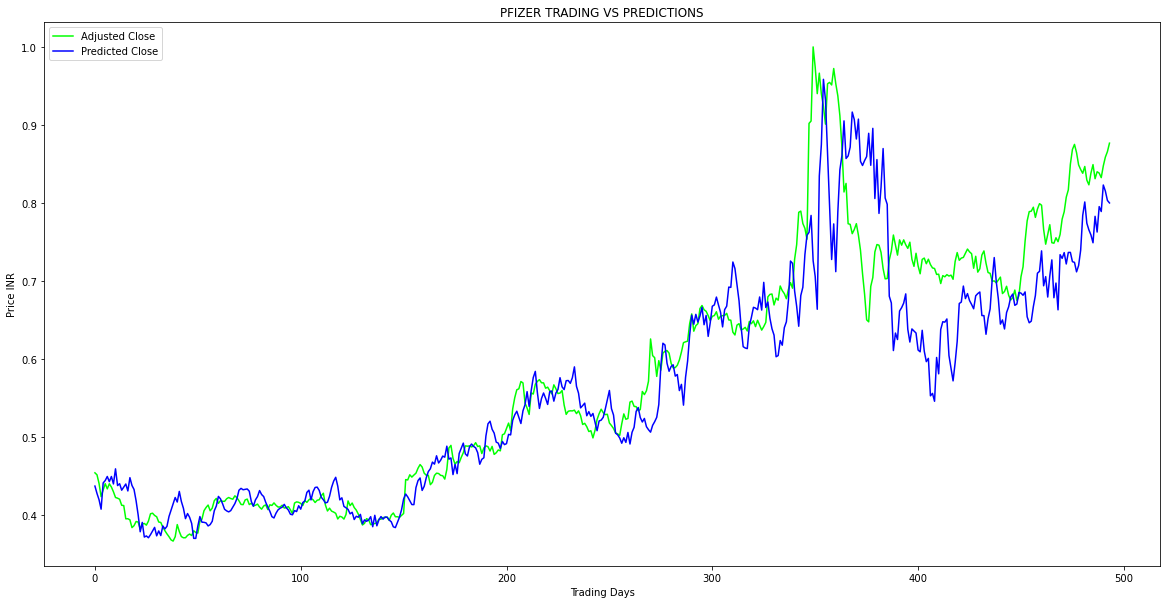

Standard Deviation of Error :  0.2113516704707392
Denormalised Standard Deviation :  694.913724924267
Ratio of Standard Deviation of Error to Standard Deviation of Stock Price :  1.0764267247235817
Train Score: 0.00016894 MSE (0.01299779 RMSE)
Test Score: 0.00396894 MSE (0.06299955 RMSE)


In [12]:
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Flatten
#TRAIN_LSTM_MODEL
cnn_model = build_CNN_model(x_train.shape[-1], unroll_length, return_sequences = True)
cnn_model.compile(loss = "mean_squared_error", optimizer = 'Adam')
cnn_model.fit(x_train, y_train, epochs = 200, validation_split = 0.05)

preds_cnn = cnn_model.predict(x_test)
plot_prediction(y_test, preds_cnn)
err_stat(y_test,preds_cnn)

trainScore = cnn_model.evaluate(x_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = cnn_model.evaluate(x_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))